# The Analysis of Titanic Data 





##  *Abstract*




This project aims to performing the different phases of Data Analysis on the Titanic dataset. This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew who were on board Titanic. The description of this dataset has been taken from the Kaggle website.





##  *Questions and Problem Definition*


According to Kaggle, The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew taking into consideration the following notes:

- There were not enough lifeboats for the passengers and crew
- Some groups of people were more likely to survive than others, such as women, children, and the upper-class

Consequently and after reviewing the dataset, the following questions have been used to start analysing this data:



- Did the gender determine the chances of survival ?
  - survival rate of males and females
- Did the age factor affect the survival chances of passengers and crews ?
   - The survival rate of children( < 18) and adults.
- Did socio-economic status affect survival rate?
- Did family relations on the ship inrease/decrease survivability ?
  - having Sibling or Spouse vs without having Sibling or Spouse
  - having Children or Parent vs without having Children or Parent
  



## *Data Wrangling*

### *Data Description*





|Column        | Description   |
|:-------------|:-------------| 
| survival      | Survival (0 = No; 1 = Yes)| 
| pclass      |Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
| name | Name|
| sex | Sex |
| age | Age |
| sibsp | Number of Siblings/ Spouses Aboard | 
| parch | Number of Parents/ Children Aboard |
| ticket| Ticket Number |
| fare | Passenger Fare |
| cabin | Cabin |
| embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)| 

#### **Variable Notes**

- *Pclass* is a proxy for socio-economic status(SES): 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- *Age* is in Years; Fractional if Age less than One (1);If the Age is Estimated, it is in the form xx.5


With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch:


- **Sibling**:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- **Spouse**:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- **Parent**:   Mother or Father of Passenger Aboard Titanic
- **Child**:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic



Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

### *Data Acquisition*




In [56]:
# Render plots inline
%matplotlib inline

# Data Analysis libraries
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn plots properties
sns.set(style="ticks", context="paper", palette="colorblind")
sns.set_context(rc={"figure.figsize": (7, 6)})

# Load the dataset 
titanic_data = pd.read_csv('titanic-data.csv')


In [4]:
# Print the first few records to review entries
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Print the last few records to review entries
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### *Data Investigation*



In [6]:
#Review data type, total entries
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


It can be seen that all data types are proper with its related feature

In [7]:
#Investigate data by summary statistics
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Investigate Categorical data
titanic_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
#Investigate numerical data
titanic_data.describe(include=None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Assumption 
As seen, the previous outputs test how representative is the chosen dataset. The total samples are 891 which represnts fairly 40% of the passengers number on Titanic (2,224)with some assumptions, as follows:

- Survived is a categorical feature with values 0 or 1 with 38% of survivors.
- Age entries are incomplete with total entries 714 that shows 20% of missing data.  
- Names are unique among the dataset with no duplications.
- Number of males exceeded the females with freq= 577 out of 891 that represents 65%. 
- Duplication is found on Tickets with 22% duplicated values.
- Cabin values show a large number of missing values with 204 entries out of 891
- Embarked have three possible value with high ratio of value "S" due to having 72% passengers from Southampton Port.

As such, missing, duplicated and less important values will be droped or replaced as following:
- Cabin feature with 22% entries only, which is the most missing value (NaN), will be dropped.
- Few Embarked values are null (only 2) and will be replaced with the most occured value. 
- PassengerId and Fare are irrelative survival factors which will be dropped.
- Ticket also will be dropped because its importance comes from defining the passegner travel class which can be  driven using the Pclass fearure. 




However, the missing values of "Age" feature wil be kept for now due to its strong correlation to survival for further analysis.

### *Data Cleanup*


#### *- Removing duplicate rows*
According to the following code, there are no duplicate rows which eleminates the need to this step.


In [10]:
# Check the possibilty of duplicated rows
print 'Duplicate row(s) is/are {}'.format(len(titanic_data[titanic_data.duplicated()]))


Duplicate row(s) is/are 0



#### * - Identifying and fixing incorrect/missing entries within the categorical features *

In [11]:
#Use function to check incorrect categorical entries
def check_entries_ctg(sample_data,feature): 
    return sample_data[feature].unique() 

#Check "Embarked" entries
check_entries_ctg(titanic_data,'Embarked')

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
#Check "Pclass" entries
check_entries_ctg(titanic_data,'Pclass')

array([3, 1, 2], dtype=int64)

In [13]:
#Check "Survived" entries
check_entries_ctg(titanic_data,'Survived')

array([0, 1], dtype=int64)

In [14]:
#Check "Sex" entries
check_entries_ctg(titanic_data, 'Sex')

array(['male', 'female'], dtype=object)

It can be seen that the categorical features of Pclass(ordinal), Survived,Sex and Embarked have no entries that out of its possible values. However, Embarked feature has only two NaN values that represnt the missing entries which confirm the previous decision of replacing them with the most occured value which is S, as follows: 

In [15]:
#Remove NaN values of "Embarked" and assign the modified dataset to n_titanic_data
sPort=titanic_data['Embarked'].mode()[0]
n_titanic_data=titanic_data
n_titanic_data['Embarked']= n_titanic_data['Embarked'].fillna(sPort)
check_entries_ctg(n_titanic_data,'Embarked')

array(['S', 'C', 'Q'], dtype=object)

In [16]:
#Group the outputs by "Embarked" for further check
n_titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True)\
.count().sort_values(by='Survived', ascending=True)

,Survived
Embarked,
Q,77
C,168
S,646


#### *-Identifying and fixing missing entries within the numerical features*


For numerical features,which are Age, Fare, SibSp, Survived, PassengerId and Parch, there is no fixed possible values which eliminate the need to use check_entries_ctg to ensure data validation except for age which is distrbuted normally accroding to the Max and Min functions:


In [17]:
#Find the maximum value of "Age"
n_titanic_data['Age'].max()

80.0

In [18]:
#Find the minimum value of "Age"
n_titanic_data['Age'].min()

0.41999999999999998

Therefore, it shows a normal distribution of Age that range from (.49) which represent an estimated age below one year and end up with 80 which means eliminating any outliers possibilty.
Thus, the concentration will be given to the case of missing values only, as follows:

In [19]:
#Find the missing values of the dataset
n_titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Obviously, the missing values occur with Age reasonably and Cabin massively. This supports the decision of removing Cabin feature. No cleaning action will be perofromed on "Age" feature due to its importance as a survival factor. More investigation will be performed, as follows:   

In [20]:
#Collect the null values of "Age"
z_age=n_titanic_data['Age'].isnull() 
n_titanic_data[z_age].tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


We can see the "NaN" values of "Age" representing its missing entries with different associated gender values. Examining this fact might help in the decision on the "Age" issue:

In [21]:
#Investigate the null value of "Age" with regard to "Sex"
z_age_male = n_titanic_data[z_age]['Sex'] == 'male'
z_age_female = n_titanic_data[z_age]['Sex'] == 'female'


#Display the results
print 'The missing values of males are {} and females are {} '.format(
z_age_male.sum(),z_age_female.sum())

The missing values of males are 124 and females are 53 


#### -* Dropping unnecessary features*


Based on the previous assumption, the following features will be dropped:

In [22]:
#Remove 'PassengerId','Ticket','Cabin','Fare', 'Name' and 'Embarked' columns
n_titanic_data= n_titanic_data.drop(['PassengerId','Ticket','Cabin','Fare', 'Name', 'Embarked'], axis=1)
n_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## *Data Exploration*


### *Questions, Analysis and Visualisations*


#### Question 1
- Did the gender determine the chances of survival ?
  - survival rate of males and females


In [23]:
#Display Results
print "Survived {} out of total {}".format(n_titanic_data["Survived"].sum(), n_titanic_data["Survived"].count())

#Review the survival rate generally
survival_mean= n_titanic_data["Survived"].mean()

#Display Results
print "Average probability of survival: {} %".format(round(survival_mean*100, 2))

Survived 342 out of total 891
Average probability of survival: 38.38 %


In [24]:
#Review and display the total number of male and female

print len(n_titanic_data[n_titanic_data['Sex'] == 'male'])
print len(n_titanic_data[n_titanic_data['Sex'] == 'female'])

577
314


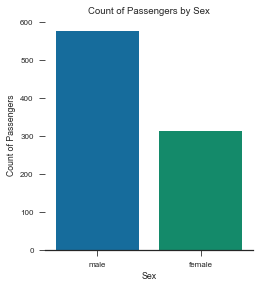

In [25]:
#Graph of Count of Passengers by "Sex" feature
figure1= sns.factorplot('Sex', data=n_titanic_data, aspect=0.9, kind='count')
figure1.despine(left=True)
figure1.set_ylabels("Count of Passengers")
sns.plt.title("Count of Passengers by Sex")

male survival rate: 18.89%
female survival rate: 74.2%
male survival number: 109
female survival number: 233


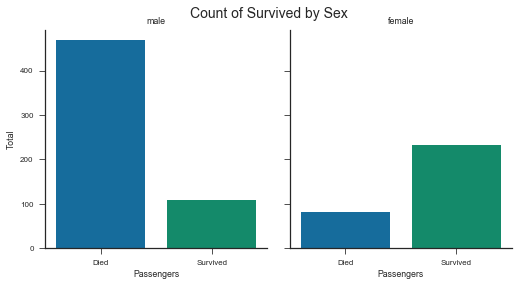

In [26]:
#Define survival_number function that take two parameters:(data= dataset, sex= male or female) \
#and return the value of sex and number of suvival by sex

def survival_number(data,sex):

    survived_by_sex =data.groupby(['Survived','Sex']).size()[1,sex]
    
    return '{} survival number: {}'.format(sex,survived_by_sex)

#Define survival_rate function that take two parameters:(data= dataset, sex= male or female) \
#and return the value of sex and suvival rate by sex

def survival_rate(data,sex):
    grouped_by_total = data.groupby(['Sex']).size()[sex].astype('float')
    survived_by_sex =data.groupby(['Survived','Sex']).size()[1,sex]
    survival_rate = ((survived_by_sex / grouped_by_total) * 100).round(2)
    
    return '{} survival rate: {}%'.format(sex,survival_rate)

#Displau results
print survival_rate(n_titanic_data,'male')
print survival_rate(n_titanic_data,'female')
print survival_number (n_titanic_data,"male")
print survival_number (n_titanic_data,"female")

#Graph of "Survived" by "Sex"
fig1 = sns.factorplot('Survived', col='Sex', data=n_titanic_data, aspect=0.9, kind='count')
fig1.set_axis_labels("Passengers","Total")
fig1.set_xticklabels(["Died", "Survived"])
fig1.set_titles("{col_name}")
fig1.fig.suptitle("Count of Survived by Sex", size=14)
fig1.fig.subplots_adjust(top=.9)

According to the above figures, the results shows 231 female survivors out of 312 compared to 109 male survivors only out of 577 with the following percentige:
- Female Survivors: 74.04%
- Male Survivors: 18.89%

As expected, females passengers had a high chance of surviving due to the fact of having the priority to be in lifeboats.

#### Question 2
- Did the age factor affect the survival chances of passengers and crews ?
  - The survival rate of children( < 18) and adults.
  
It has been mentioned previously the case of missing value within "Age" feature which will be handled in this analysis:


The total missing values are 177:
The missing values of males are 124 and females are 53 
The total count of Ages after removing missing values is: 714
The age of oldest passenger is: 80.0
The age of youngest passenger is: 0.42
The average of passengers ages is: 30.0


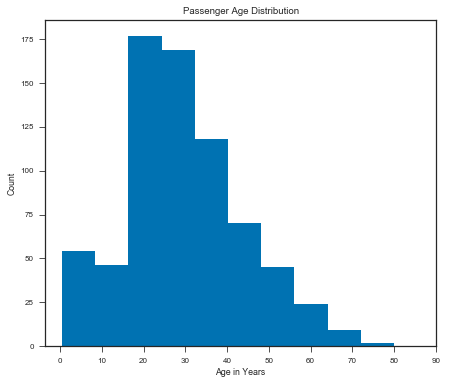

In [27]:
#Determine the missing values of "Age" generally and with regard to female and male entries:
print "The total missing values are {}:\nThe missing values of males are {} and females are {} ".format(z_age.sum(),z_age_male.sum(),z_age_female.sum())

#Remove the missing values to avoid any effect on the summary statistics such as: mean.
titanic_data_age= n_titanic_data.dropna()
print "The total count of Ages after removing missing values is: {}".format(titanic_data_age['Age'].count())

#Find average, max and min of all passenger ages
print "The age of oldest passenger is: {}".format(titanic_data_age["Age"].max())
print "The age of youngest passenger is: {}".format(titanic_data_age["Age"].min())
print "The average of passengers ages is: {}".format(round(titanic_data_age["Age"].mean(),0))

#Graph of "Age" feature distribution - 1
fig4=titanic_data_age['Age'].plot.hist(title="Passenger Age Distribution")
fig4.set(xticks=np.arange(0,100,10))
fig4.set_xlabel("Age in Years")
fig4.set_ylabel("Count")



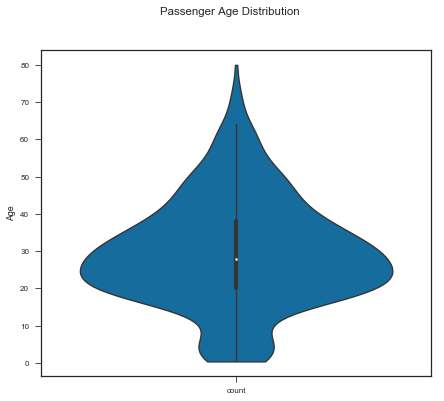

In [28]:
#Graph of "Age" feature distribution - 2
fig5=sns.violinplot(data=titanic_data_age, y= 'Age', cut=0, ) 
sns.plt.suptitle('Passenger Age Distribution')
fig5.set_xticklabels(["count"])

Obviously, the largest age distribution among passengers range from 10 to 38 years old with an average of 30 years. Thus, we will dig deeper by trying to find the possiblity of a correlation between the Age and Survivability.


In [29]:
#Find total number of survivors and victims
survivors_age_cleaned = titanic_data_age.groupby(['Survived']).size()[1]
victims_age_cleaned = titanic_data_age.groupby(['Survived']).size()[0]

#Find the mean of survivors and victims ages
mean_age_survivors = round(titanic_data_age[titanic_data_age['Survived'] == True]['Age'].mean(),2)
mean_age_victims = round(titanic_data_age[titanic_data_age['Survived'] == False]['Age'].mean(),2)

#Display results
print "The total number of Survivors: {}".format(survivors_age_cleaned)
print "The total number of Victims: {}".format(victims_age_cleaned)
print "The mean age of Survivors: {}".format(mean_age_survivors)
print "The mean age of Victims: {}".format(mean_age_victims)


The total number of Survivors: 290
The total number of Victims: 424
The mean age of Survivors: 28.34
The mean age of Victims: 30.63


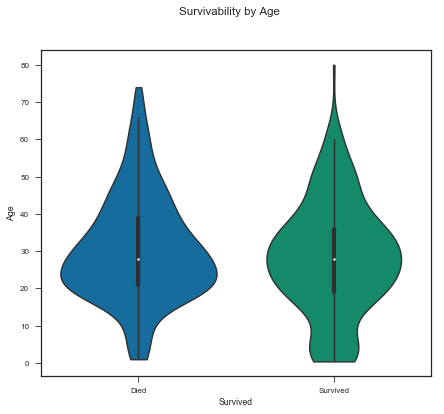

In [30]:
#Graph of "Survived" by "Age"
fig6=sns.violinplot(x='Survived', y='Age', data=titanic_data_age, cut=0)
fig6.set_xticklabels(["Died", "Survived"])
sns.plt.suptitle('Survivability by Age')

Based on the graphs and results, it can be seen that the mean for both survivors and victims groups nearly the same which weaken the "Age" as a survival factor.
However, there is no information about the passengers ages in terms of the type of "child" and "adults". Therefore,there is a need to classify the data more into childhood and adulthood groups using the following condition:

    - Child: a passenger < 18.
    - Woman: a female passenger >= 18 years old.
    - Man: a male passenger >= 18 years old. 
    

In [40]:
#Create a new feature named "Status" to show the difference types of passengers:child, women and men
titanic_data_age.loc[(titanic_data_age['Age'] < 18),'Status'] = 'Child'


titanic_data_age.loc[( (titanic_data_age['Age'] >= 18)& \
                      (titanic_data_age['Sex'] == 'female')),'Status'] = 'Woman'

titanic_data_age.loc[( (titanic_data_age['Age'] >= 18)& \
                      (titanic_data_age['Sex'] == 'male')),'Status'] = 'Man'

#Count the total number of each type for each status (survived and not survived)
child_data=pd.DataFrame(titanic_data_age[titanic_data_age['Status'] == 'Child'])
women_data=pd.DataFrame(titanic_data_age[titanic_data_age['Status'] == 'Woman'])
men_data=pd.DataFrame(titanic_data_age[titanic_data_age['Status'] == 'Man'])

pd.DataFrame({"Children": {"Total number": len(child_data)},"Women": {"Total number": len(women_data)},\
              "Men": {"Total number": len(men_data)}})


,Children,Men,Women
Total number,113,395,206


The total number of Survived Child: 61
The total number of Survived Women: 159
The total number of Survived Men: 70


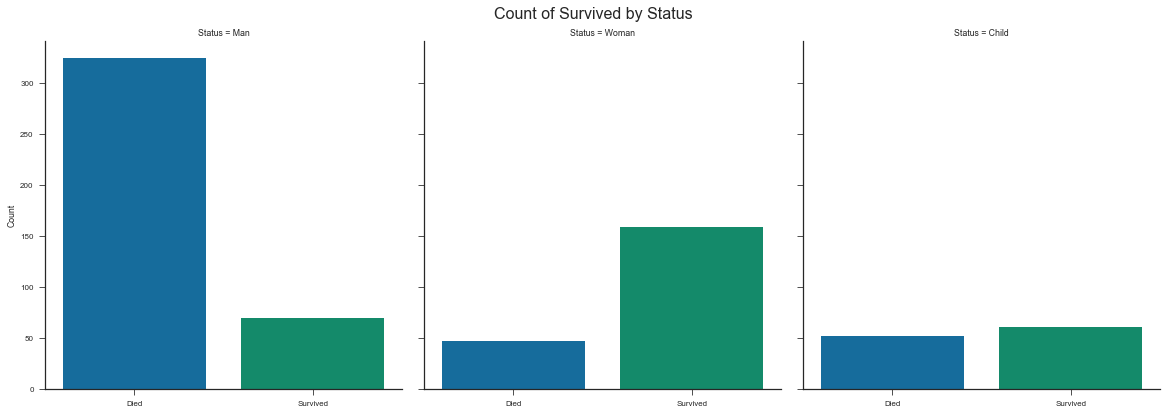

In [41]:
#Display results
print "The total number of Survived Child: {}".format(len(child_data[child_data['Survived'] == True]))
print "The total number of Survived Women: {}".format(len(women_data[women_data['Survived'] == True]))
print "The total number of Survived Men: {}".format(len(men_data[men_data['Survived'] == True]))

#Graph of "Survived" by "Status" of child, men and women
fig7= sns.factorplot(x='Survived', col='Status', data=titanic_data_age, kind='count', size=6, aspect=.9)
fig7.set_axis_labels('', 'Count')
fig7.set_xticklabels(['Died', 'Survived'])
fig7.fig.suptitle("Count of Survived by Status", size=16)
fig7.fig.subplots_adjust(top=.9)


The results and graphs above support the importance of pre-mentioned "Sex" factor in showing high number of victims in the male side compared to female side. Additionally, It also supports the code of "women and children first" which possibly increase the number of survived people in case of women and children than men. However, the number of children who survived or died are quite close to each other. In addition, there is another point need to be considered in terms of defining the range of childhood ages which differ in the 1900's with what we define it now. This argument might affect the results and its related values. To sum up, we can see that the female have high chance of surviving followed by children.


#### **Question3**
- Did socio-economic status affect survival rate taking into consideration the Status feature?

In [42]:
#Define the number of survivals grouped by Pclass and status
Pclass_survived_size = titanic_data_age.groupby(['Pclass','Survived','Status']).size()

#Display results
print Pclass_survived_size



Pclass  Survived  Status
1       0         Child       1
                  Man        61
                  Woman       2
        1         Child      11
                  Man        36
                  Woman      75
2       0         Child       2
                  Man        82
                  Woman       6
        1         Child      21
                  Man         6
                  Woman      56
3       0         Child      49
                  Man       182
                  Woman      39
        1         Child      29
                  Man        28
                  Woman      28
dtype: int64


According to the previous analysis , the numbers of survival in Class 1 and 2 are quite higher than the others from Class 3 which strengthen considering "Pclass" feature as a primary factor in the survival rate of the Titanic passengers.
This assumption will get more clear by the following graph that shows the survival rate of each class for each passenger's status. 

In [43]:
#Define survival_rate_by_status_class function that take three parameters:(data= dataset, pclass= 1, 2 or 3, 
# status= Child, Man or Woman)and return the class type, the status value and the survival rate by them
def survival_rate_by_status_class(data, pclass, status):
    total_pclass_status= data.groupby(['Pclass', 'Status']).size()[pclass,status].astype('float')
    survived_pclass_status = \
        data.groupby(['Pclass','Survived','Status']).size()[pclass,1,status].astype('float')
    survival_rate = ((survived_pclass_status / total_pclass_status) * 100).round(2)
    
    return 'Class{} / {} survival rate: {}% \n'.format(pclass,status,survival_rate)


#Display results
print survival_rate_by_status_class(child_data,1,'Child')
print survival_rate_by_status_class(child_data,2,'Child')
print survival_rate_by_status_class(child_data,3,'Child')
print survival_rate_by_status_class(men_data,1,'Man')
print survival_rate_by_status_class(men_data,2,'Man')
print survival_rate_by_status_class(men_data,3,'Man')
print survival_rate_by_status_class(women_data,1,'Woman')
print survival_rate_by_status_class(women_data,2,'Woman')
print survival_rate_by_status_class(women_data,3,'Woman')

Class1 / Child survival rate: 91.67% 

Class2 / Child survival rate: 91.3% 

Class3 / Child survival rate: 37.18% 

Class1 / Man survival rate: 37.11% 

Class2 / Man survival rate: 6.82% 

Class3 / Man survival rate: 13.33% 

Class1 / Woman survival rate: 97.4% 

Class2 / Woman survival rate: 90.32% 

Class3 / Woman survival rate: 41.79% 



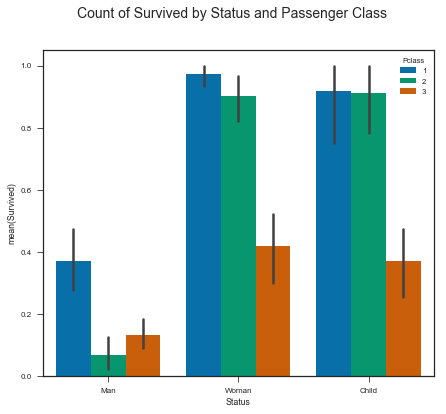

In [44]:
#Graph of "Survived" grouped by status and Pclass
fig8 = sns.barplot(x="Status", y="Survived", hue="Pclass", data=titanic_data_age,saturation=.9)
sns.plt.suptitle("Count of Survived by Status and Passenger Class", size=14)

Based on the the sample provided, the above plot confirms that women and children had a quite high survival rate than the male in the Titanic ship. By looking closer to each passennger class, we can see that class 1 had the highest rate among all passengers followd by class 2 (except for Men which is the lowest) and ended up with class 3 with the lowest chance of surviving. Additionally, the men survived less than half the rate of women and children.

In [66]:
#Categorise the dataset into: data of survived and victims with regard tp Passenger classes (Pclass 1,
# Pclass 2 and Pclass 3)

class1_data= titanic_data_age[titanic_data_age.Pclass == 1]
class2_data= titanic_data_age[titanic_data_age.Pclass == 2]
class3_data= titanic_data_age[titanic_data_age.Pclass == 3]

class1_data[class1_data.Survived == 1].count()['Pclass']
class2_Survived = class2_data[class2_data.Survived == 1].count()['Pclass']
class3_Survived = class3_data[class3_data.Survived == 1].count()['Pclass']

class1_victims= class1_data[class1_data.Survived == 0].count()['Pclass']
class2_victims= class2_data[class2_data.Survived == 0].count()['Pclass']
class3_victims= class3_data[class3_data.Survived == 0].count()['Pclass']

#Collect data using NumPy array
pclass_survival_numbers = np.array([[class1_Survived, class1_victims],[class2_Survived, class2_victims],\
                                 [class3_Survived,class3_victims ]])


#Display Results
print(pclass_survival_numbers)

#Chi-Square Test of Survived and Pclass factors independence
sp.stats.chi2_contingency(pclass_survival_numbers)




[[122  64]
 [ 83  90]
 [ 85 270]]


(92.901417211433213,
 6.7098617497569091e-21,
 2L,
 array([[  75.54621849,  110.45378151],
        [  70.26610644,  102.73389356],
        [ 144.18767507,  210.81232493]]))

As seen, the survived and non-survived in regards to passenger classes have been categorised in order to calculate Chi-square of independance for the above factors. Based on the results above, the p-value is 6.7098617497569091e-21 which is extremely quite low to .05 (< 0.05). This is indicating the correlation between survived passengers and their travel class. As such, we can reject the null hypotheses and confirm the depenedency of higher chance of survival rate for passenger and having a high passenger class.


#### **Question 4 - A**

- Did family relations on the ship inrease/decrease Women survivability ?
      
     - having (Sibling or Spouse) vs without having (Sibling or Spouse) 

In [45]:
#Categorise the dataset into: data of survived women with Sibling and Suppose 
#and data of survived women without Sibling and Suppose
woman_data_with_SibSp = titanic_data_age.loc[
    (titanic_data_age['Status'] == 'Woman')&(titanic_data_age['SibSp'] > 0)]

woman_data_without_SibSp = titanic_data_age.loc[
    (titanic_data_age['Status'] == 'Woman') & (titanic_data_age['SibSp'] == 0)]

#Find the total number of women with Sibling and Suppose(in general), survived women with Sibling and Suppose
total_women_SibSp= woman_data_with_SibSp['Survived'].count()
survived_woman_SibSp_count= float(len((woman_data_with_SibSp[woman_data_with_SibSp['Survived'] == 1])))
survived_woman_SibSp=woman_data_with_SibSp[woman_data_with_SibSp['Survived'] == 1]


#Find the survival rate of survived women with Sibling and Suppose
rate_survived_woman_SibSp = round(((survived_woman_SibSp_count/total_women_SibSp)*100),2)


#Display results
print 'Total number of women with sibling/suppose: {}\n\
survived women with sibling/suppose: {}\n\
non servived women with sibling/suppose: {}\n\
Average age of survived women with sibling/suppose: {}\n\
Percentage of survived women with sibling/suppose: {}%'.format(total_women_SibSp, survived_woman_SibSp_count, 
        (total_women_SibSp-survived_woman_SibSp_count), round(survived_woman_SibSp["Age"].mean(),2), rate_survived_woman_SibSp)

Total number of women with sibling/suppose: 86
survived women with sibling/suppose: 64.0
non servived women with sibling/suppose: 22.0
Average age of survived women with sibling/suppose: 34.95
Percentage of survived women with sibling/suppose: 74.42%


As shown, there is a high possibilty of surviving for woman with sibling or spouse than those without

   #### **Question 4 - B  **

- Did family relations on the ship inrease/decrease Women survivability ?
      
     - having Children or Parent vs without having Children or Parent

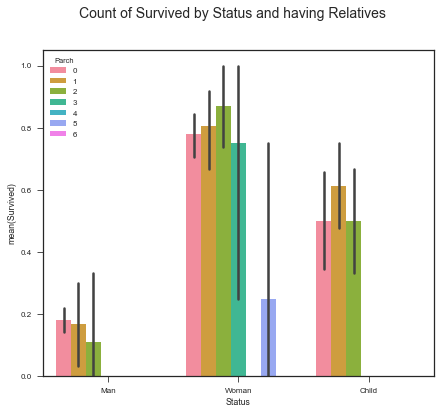

In [46]:
#Graph of "Survived" grouped by "Status" and "Parch" values
fig9 = sns.barplot(x="Status", y="Survived", hue="Parch", data=titanic_data_age,saturation=.9)
sns.plt.suptitle("Count of Survived by Status and having Relatives", size=14)

Obviously, the graph above shows that the total number of survived passenger with relatives exceeded those without ones. Therefore, more concentration will be given to this feature by narrowing the anlalysis to the case of Woman which has the highest number of survivors than men and children. As such, women case only has been chosen as experiment as folows:

In [47]:
#Categorise the dataset into: data of survived women with Children and Parent 
#and data of survived women without Children and Parent 
woman_data_with_Parch = titanic_data_age.loc[
    (titanic_data_age['Status'] == 'Woman')&(titanic_data_age['Parch'] > 0)]

woman_data_without_Parch = titanic_data_age.loc[
    (titanic_data_age['Status'] == 'Woman') & (titanic_data_age['Parch'] == 0)]

#Find the total number of Women with Children and Parent (in general), Survived Women with Children and Parent
survived_woman_Parch=woman_data_with_Parch[woman_data_with_Parch['Survived'] == 1]
survived_woman_Parch_count =float(len((woman_data_with_Parch[woman_data_with_Parch['Survived'] == 1])))
total_woman_Parch = woman_data_with_Parch['Survived'].count()



#Find the survival rate of Survived Women with Children and Parent
rate_survived_woman_Parch = round(((survived_woman_Parch_count/total_woman_Parch)*100),2)



#Display results
print 'Total number of women with parents/children: {}\n\
survived women with parents/children: {}\n\
non servived women with parents/children: {}\n\
Average age of survived women with parents/children: {}\n\
Percentage of survived women with parents/children: {}%'.format(total_woman_Parch, survived_woman_Parch_count, 
        (total_woman_Parch-survived_woman_Parch_count), round(survived_woman_Parch["Age"].mean(),2), rate_survived_woman_Parch)

Total number of women with parents/children: 70
survived women with parents/children: 53.0
non servived women with parents/children: 17.0
Average age of survived women with parents/children: 32.91
Percentage of survived women with parents/children: 75.71%


Continueously, the number of survived women with parents or children is much greater than those without. we can conclude that women who have relatives on Titanic had a higher chance of surviving. Therefore, we will examine the chance of suriving between passengers in general with relatives and those without relatives for the whole sample size, as follows:

In [48]:
#Categorise the dataset into: data of survival with relatives 
#and data of survival without relatives
with_relatives = titanic_data_age[(titanic_data_age['SibSp'] > 0) | (titanic_data_age['Parch'] > 0)]['Survived']
non_relatives = titanic_data_age[(titanic_data_age['SibSp'] == 0) & (titanic_data_age['Parch'] == 0)]['Survived']

#Find t-test and P-value 
t, p = stats.ttest_ind(with_relatives, non_relatives)

#Display results
print "The number of survival with relatives: {}".format(with_relatives.sum())
print "The number of survival without relatives: {}".format(non_relatives.sum())
print "\n t-statistic is : {} \n p-value is : {}".format(t,p)


The number of survival with relatives: 160
The number of survival without relatives: 130

 t-statistic is : 5.33735310564 
 p-value is : 1.26916682625e-07


Based on the results above, the p-value is 1.26916682625e-07 which is quite lower < 0.05. This is indicating the correlation between survived passengers and having their relatives on board. As such, we can reject the null hypotheses and confirm the depenedency of higher chance of survival rate for passenger and having relatives.

## *Conclusion*

Titanic was one of the most tragic story for more than a century. As such, there is a great interest in defining the factors behind being survived as a passenger on that ship. Thus, a deep analysis has been conducted that includes comparing the outcomes of each question and performing statistical calculations. We can end up with the following points: 
- The sample represent 40% of population with some missing values that might affect the outcome (such as Age with 20% missing values.
- The most leading factors of surviving rate are: "Sex", "Pclass" and "Having relatives" wether are: suppose, sibling, parents or children.
- The Age was not a deciding factor of survival rate.
- Men rates of survival were more less than half compared to women and children within the same class.
- The passengers at 1st class were most likely to survive than other classes rgardless of gender. 
- The female on 1st and 2nd class at the ship with relative had the highest chance of survivg with 75% compared to other women
- The men on 3rd and 2nd class at the ship had the lowest chance of survivng ranging from 6% to 13% only.


## *References*

- https://pandas.pydata.org/
- https://docs.scipy.org/doc/scipy/reference/index.html
- https://www.kaggle.com/c/titanic
- http://seaborn.pydata.org/tutorial/categorical.html
- https://en.wikipedia.org/wiki/RMS_Titanic
- https://classroom.udacity.com
